In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 99

In [2]:
os.chdir('..')  # change to root directory

In [3]:
# Load data
import pickle
with open('./data/d_data.pkl', 'rb') as infile:
    d_data = pickle.load(infile)
d_data.keys()

dict_keys(['fullbay', 'fullbayerr', 'shortbay', 'shortbayerr', 'redshift', 'observed', 'observederr'])

In [4]:
df_fullbay = d_data['fullbay']
idx_tot = df_fullbay.index
idx_ha = idx_tot[idx_tot.str.contains('.DR1.')]
idx_dp = idx_tot[~idx_tot.str.contains('.DR1.')]

# Data ranges

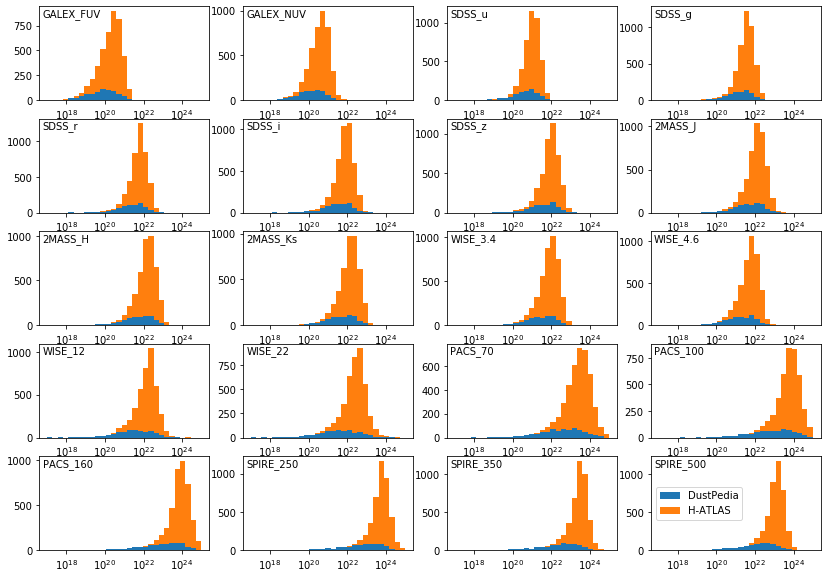

In [5]:
f, axarr = plt.subplots(5, 4, figsize=(14, 10))
df_fullbay = d_data['fullbay']
bins = np.logspace(17, 25, 30)
for ax, col in zip(axarr.flatten(), df_fullbay.columns):
    ax.set_xscale('log')
    ax.hist([df_fullbay.loc[idx_dp, col], df_fullbay.loc[idx_ha, col]], bins=bins, histtype='barstacked',
            label=['DustPedia', 'H-ATLAS'])
    ax.text(0.02, 0.98, col, transform=ax.transAxes, ha='left', va='top')
    
axarr[-1, -1].legend(loc='center left');

# Some SEDs

This part requires the installation of [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/user_install.html).

In [6]:
df_fullbay.head()

,GALEX_FUV,GALEX_NUV,SDSS_u,SDSS_g,SDSS_r,SDSS_i,SDSS_z,2MASS_J,2MASS_H,2MASS_Ks,WISE_3.4,WISE_4.6,WISE_12,WISE_22,PACS_70,PACS_100,PACS_160,SPIRE_250,SPIRE_350,SPIRE_500
id,,,,,,,,,,,,,,,,,,,,
NGC5358,1.733052e+19,3.526650e+19,3.673337e+20,1.683368e+21,3.067609e+21,4.135898e+21,5.419436e+21,6.896710e+21,8.373253e+21,6.624694e+21,3.439570e+21,2.022081e+21,6.495175e+20,3.608676e+20,1.631530e+21,3.849767e+21,7.029431e+21,7.223310e+21,4.707810e+21,2.326067e+21
NGC3252,6.183103e+19,1.030934e+20,2.913592e+20,9.690606e+20,1.477614e+21,1.860479e+21,2.330724e+21,2.888652e+21,3.498056e+21,2.863824e+21,1.867488e+21,1.077721e+21,3.559318e+21,4.407260e+21,5.410393e+22,1.330661e+23,1.695867e+23,1.064446e+23,5.226665e+22,2.085894e+22
ESO407-002,2.610452e+19,5.569750e+19,2.249914e+20,8.548477e+20,1.337644e+21,1.709715e+21,2.138156e+21,2.656783e+21,3.223868e+21,2.644181e+21,1.692660e+21,9.771990e+20,2.736407e+21,2.879582e+21,3.965581e+22,8.665135e+22,9.707793e+22,5.528791e+22,2.597681e+22,1.005627e+22
NGC4194,4.200884e+20,9.387929e+20,2.232819e+21,5.982152e+21,8.880920e+21,1.129762e+22,1.457740e+22,1.860334e+22,2.279923e+22,1.957544e+22,1.692298e+22,1.593844e+22,1.725724e+23,5.600938e+23,5.227392e+24,5.102968e+24,2.619532e+24,8.846346e+23,3.332692e+23,1.115698e+23
NGC7172,5.927441e+19,1.344538e+20,8.586243e+20,4.813025e+21,1.063039e+22,1.726060e+22,2.612933e+22,4.111562e+22,5.775144e+22,5.077326e+22,3.350657e+22,1.963228e+22,5.461372e+22,7.459135e+22,1.061334e+24,1.870378e+24,1.701748e+24,8.335784e+23,3.662915e+23,1.354121e+23


In [7]:
from ipywidgets import interact
from firenet.plotting.sed import SEDPlotter

d_kwargs = {'fullbay': {'linestyle': '-', 'color': '#377eb8', 'alpha': 0.7, 'fill': True},
            'shortbay': {'linestyle': '-', 'color': '#e41a1c', 'alpha': 0.7, 'fill': True},
            'observed': {'color': 'k'}}

def plot_sed_gal(name, show_full=True, show_short=True, show_observed=True):
    plot_sims = []
    if show_full:
        plot_sims.append('fullbay')
    if show_short:
        plot_sims.append('shortbay')
    if show_observed:
        plot_sims.append('observed')
    splot = SEDPlotter(figsize=(10, 7))
    for simname in plot_sims:
        flux = d_data[simname].loc[name, :]
        err = d_data[simname+'err'].loc[name, :]
        splot.add_broadband_series(flux, err, **d_kwargs[simname])
    splot.show()
    
interact(plot_sed_gal, name=df_fullbay.index)

interactive(children=(Dropdown(description='name', options=('NGC5358', 'NGC3252', 'ESO407-002', 'NGC4194', 'NG…

<function __main__.plot_sed_gal(name, show_full=True, show_short=True, show_observed=True)>

# CIGALE true vs pred

Symmetrize errors in log space.

In [8]:
firbands = d_data['fullbay'].columns[-6:]
y_t = d_data['fullbay'][firbands].divide(d_data['shortbay']['WISE_3.4'], axis=0).apply(np.log10)
y_p = d_data['shortbay'][firbands].divide(d_data['shortbay']['WISE_3.4'], axis=0).apply(np.log10)
y_perr = d_data['shortbayerr'][firbands].divide(d_data['shortbay'] * np.log(10), axis=0)
y_terr = d_data['fullbayerr'][firbands].divide(d_data['fullbay'] * np.log(10), axis=0)

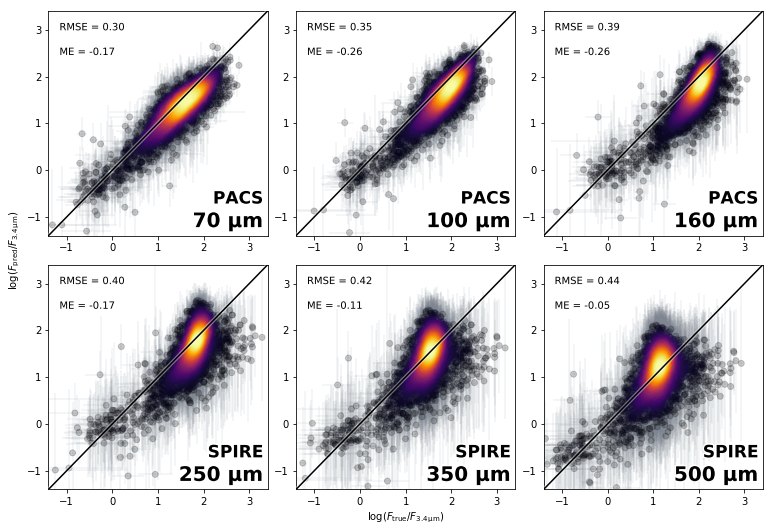

In [9]:
# See paper Fig. 2
from firenet.plotting.truevspred import TrueVSPredPlotter

tvpplot = TrueVSPredPlotter(figsize=(12.8, 8.8))
tvpplot.create_panels(nrows=1)
panel = tvpplot.get_panel(0)
extras_kwargs = {'metrics': ['rmse', 'me']}
panel.stylized_plot(y_t, y_p, y_terr=y_terr, y_perr=y_perr, 
                    style='firflux', extras_kwargs=extras_kwargs)